# The Sparks Foundation

# Author - Jimy Patel

# TASK-6 PREDICTION USING DECISION TREE ALGORITHM

# OBJECTIVE : CREATE A DECISION TREE TO PREDICT RIGHT CLASS AND VISUALIZE IT GRAPHICALLY

In [2]:
# IMPORT THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# READ THE IRIS DATASET
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# GET BRIEF DESCRIPTION OF THE DATASET 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# CHECK FOR NULL VALUES
# IT CAN BE SEEN THAT THERE ARE NO NULL VALUES
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

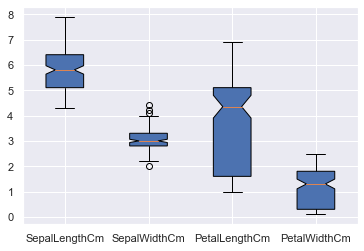

In [7]:
# CHECK FOR OUTLIERS THAT WILL SPOIL THE CLASSIFICATION MODEL USING BOXPLOT
# IT IS EVIDENT THAT THE 'SepalWidthCm' HAS OUTLIERS
SepalLengthCm = data['SepalLengthCm']
SepalWidthCm = data['SepalWidthCm']
PetalLengthCm = data['PetalLengthCm']
PetalWidthCm = data['PetalWidthCm']

columns = [SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]

fig,ax = plt.subplots()
ax.boxplot(columns,notch=True,patch_artist=True)
plt.xticks([1,2,3,4],['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
plt.show()

In [8]:
# TO REMOVE THE IN 'SepalWidthCm' , USE THE INTER-QUARTILE RANGE TO GET THE MIN AND MAX VALUES OF THE WHISKERS FROM THE BOXPLOT
Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

ur = Q3+1.5*IQR
lr = Q1-1.5*IQR

# NOW REMOVE THE VALUES GREATER THAN 'ur' AND LESSER THAN 'lr'
samp = data.index[data['SepalWidthCm'] > ur]
samp.append(data.index[data['SepalWidthCm'] < lr])
data = data.drop(samp)
data.reset_index(drop=True)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
# SPLIT DATASET FOR TRAINING AND TESTING
df = data.copy()
x = df.iloc[:,1:5]
y = df.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
# PERFORM THE DECISION TREE CLASSIFICATION AND THEN FIND THE PREDICTED VALUES USING THE TESTING DATASET
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [11]:
# CHECK THE ACCURACY ACHIEVED BY THE MODEL IN THE TESTING DATASET
# IT IS EVIDENT THAT THE MODEL PREDICTS THE CLASS EXTREMELY WELL EVEN IN THE TESTING DATASET
accuracy = accuracy_score(y_test,y_pred)
accuracy*100

97.2972972972973

In [12]:
# COMPARE THE ACTUAL AND PREDICTED VALUES BY CREATING A DATAFRAME
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica


In [13]:
# CREATE AND VISUALIZE A CONFUSION MATRIX BY USING CROSSTABLE AND HEATMAP
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted        Iris-setosa  Iris-versicolor  Iris-virginica
Actual                                                       
Iris-setosa               14                0               0
Iris-versicolor            0                9               1
Iris-virginica             0                0              13


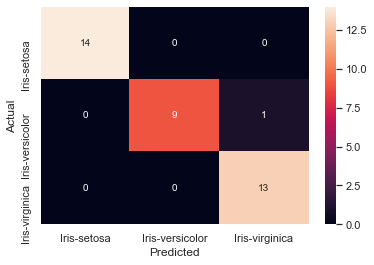

In [14]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

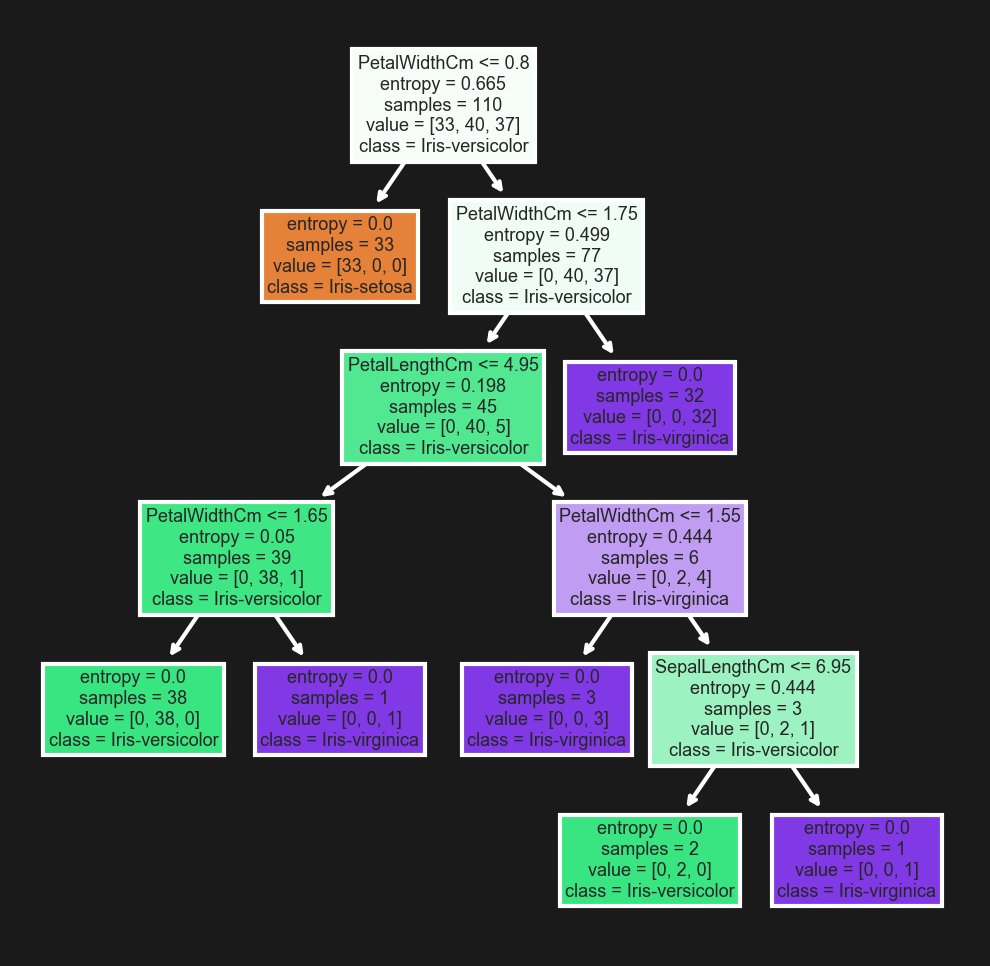

In [15]:
# PLOT THE DECISION TREE MODEL USING sklearn.tree.plot_tree AND THEN SAVE THE PNG IMAGE 

from sklearn import tree
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300,facecolor='k')
tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTree.png')

In [16]:
# PREDICT THE PROBABILITY OF THE NEW DATA BELONGING TO A PARTICULAR CLASS
clf.predict_proba([[4.7,3.2,1.3,0.2]])

array([[1., 0., 0.]])

In [17]:
# PREDICT THE CLASS OF THE NEW DATA
clf.predict([[4.7,3.2,1.3,0.2]])

array(['Iris-setosa'], dtype=object)

# Hence, the Decision Tree Model has been created and visualized with the Accuracy of 97.29% in the Test dataset.

# It also predict the class of the new data successfully.